### Need :
If we apply a linear model on a linear dataset, then it provides us a good result as we have seen in Simple Linear Regression, but if we apply the same model without any modification on a non-linear dataset, then it will produce a drastic output. Due to which loss function will increase, the error rate will be high, and accuracy will be decreased.
So for such cases, where data points are arranged in a non-linear fashion, we need the Polynomial Regression model. We can understand it in a better way using the below comparison diagram of the linear dataset and non-linear dataset.

Note: A Polynomial Regression algorithm is also called Polynomial Linear Regression because it does not depend on the variables, instead, it depends on the coefficients, which are arranged in a linear fashion.

### Equation of the Polynomial Regression Model:
Simple Linear Regression equation:         y = b0+b1x         .........(a)

Multiple Linear Regression equation:         y= b0+b1x+ b2x2+ b3x3+....+ bnxn         .........(b)

Polynomial Regression equation:         y= b0+b1x + b2x2+ b3x3+....+ bnxn         ..........(c)


When we compare the above three equations, we can clearly see that all three equations are Polynomial equations but differ by the degree of variables. The Simple and Multiple Linear equations are also Polynomial equations with a single degree, and the Polynomial regression equation is Linear equation with the nth degree. So if we add a degree to our linear equations, then it will be converted into Polynomial Linear equations.

### Steps for Polynomial Regression:
The main steps involved in Polynomial Regression are given below:

1. Data Pre-processing
2. Build a Linear Regression model and fit it to the dataset
3. Build a Polynomial Regression model and fit it to the dataset
4. Visualize the result for Linear Regression and Polynomial Regression model.
5. Predicting the output.


## Problem Description:
There is a Human Resource company, which is going to hire a new candidate. The candidate has told his previous salary 160K per annum, and the HR have to check whether he is telling the truth or bluff. So to identify this, they only have a dataset of his previous company in which the salaries of the top 10 positions are mentioned with their levels. By checking the dataset available, we have found that there is a non-linear relationship between the Position levels and the salaries. Our goal is to build a Bluffing detector regression model, so HR can hire an honest candidate. Below are the steps to build such a model.

In [1]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
df= pd.read_csv('Position_Salaries.csv')  
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [2]:
x= df.iloc[:, 1:2].values  
y= df.iloc[:, 2].values  

In the Polynomial Regression model, we will not use feature scaling, and also we will not split our dataset into training and test set. It has two reasons:

The dataset contains very less information which is not suitable to divide it into a test and training set, else our model will not be able to find the correlations between the salaries and levels.
In this model, we want very accurate predictions for salary, so the model should have enough information.

In [3]:
from sklearn.linear_model import LinearRegression  
lin_regs= LinearRegression()  
lin_regs.fit(x,y) 
lin_pred = lin_regs.predict(x)

In [10]:
lin_pre = lin_regs.predict([[6.5]])  
print(lin_pre)  

[330378.78787879]


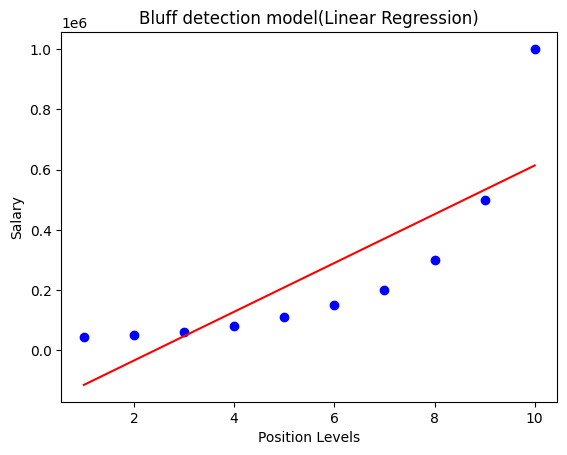

In [4]:
mtp.scatter(x,y,color="blue")  
mtp.plot(x,lin_pred, color="red")  
mtp.title("Bluff detection model(Linear Regression)")  
mtp.xlabel("Position Levels")  
mtp.ylabel("Salary")  
mtp.show()  

In [20]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 4)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  
ploy_pred = lin_reg_2.predict(x_poly)

In [21]:
poly_pre = lin_reg_2.predict(poly_regs.fit_transform([[6.5]]))  
print(poly_pre)  #[158862.45265153]

[158862.4526515]


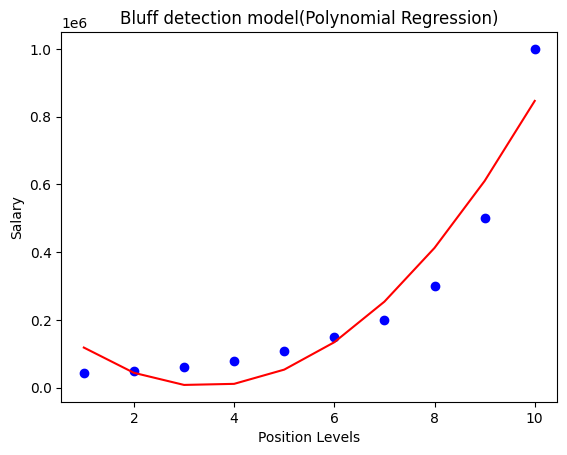

In [6]:
mtp.scatter(x,y,color="blue")  
mtp.plot(x, ploy_pred, color="red")  
mtp.title("Bluff detection model(Polynomial Regression)")  
mtp.xlabel("Position Levels")  
mtp.ylabel("Salary")  
mtp.show()  

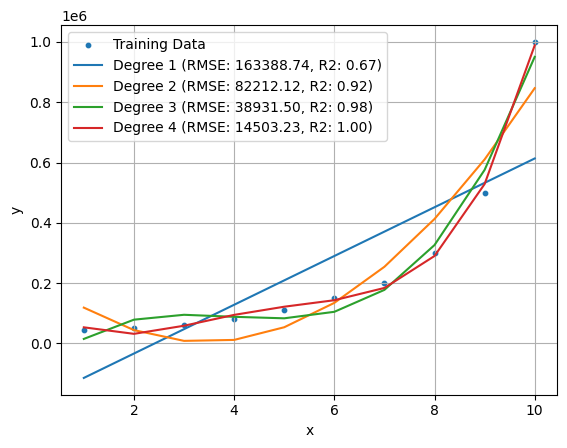

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score

mtp.scatter(x, y, s=10, label='Training Data')

for degree in [1, 2, 3,4]:
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(x_poly, y)
    poly_pred = lin_reg_2.predict(x_poly)

    # Calculate RMSE and R-squared score
    rmse = np.sqrt(mean_squared_error(y, poly_pred))
    r2 = r2_score(y, poly_pred)

    # Sort the values of x before line plot
    sort_axis = np.argsort(x.flatten())
    x_sorted = x.flatten()[sort_axis]
    y_poly_pred_sorted = poly_pred[sort_axis]

    # Plot the fitted polynomial line
    label = f'Degree {degree} (RMSE: {rmse:.2f}, R2: {r2:.2f})'
    mtp.plot(x_sorted, y_poly_pred_sorted, label=label)

mtp.xlabel('x')
mtp.ylabel('y')
mtp.legend()
mtp.grid(True)